<a href="https://www.kaggle.com/code/burningbear06/coffee-explorer-notebook?scriptVersionId=92177749" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Coffee Explorer 
A beginner's attempt at applying machine learning models to this dataset. I hope it aids in your learning and I hope to learn a thing or 2 from whatever feedback I may receive. <br>
This was my end of semester final project. <br>
__Justin Goh__


__Imports:__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab
%matplotlib inline

__Introduction__<br>
I recently got into the hobby of drinking specialty coffee and actually paying attention to how different coffee beans vary from one another. One thing I discovered was that there is a process for determing whether a particular coffee bean can be considered a specialty coffee. <br> 

Coffee judges evalaute and score a coffee on various factors, these scores contribute to the coffee's total cup point. If the total cup point is above 80 (on a 100 point scale), the coffee can be considered a specialty coffee. <br>

My project is to determine whether or not these factors do contribute to a high total cup point.

__Hypothesis testing:__<br>

__Ho:__ There is no relation between Aroma, Flavor, aftertaste, acidity, body, balance, uniformity, clean cup, sweetness, Avg_Altitude, processing method and Total Cup Points.<br>

__H1:__ There is a relation between Aroma, Flavor, aftertaste, acidity, body, balance, uniformity, clean cup, sweetness, Avg_Altitude, processing method and Total Cup Points. <br>

__Response variable:__ Total.Cup.Points  <br>

__Predictors:__  Aroma, Flavor, aftertaste, acidity, body, balance, altitude_mean_meters, processing method, uniformity, clean cup, sweetness 



In [2]:
# Settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
coffee_data = pd.read_csv('../input/merged-data-cleaned/merged_data_cleaned.csv')
coffee_data.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


__Exploratory Data Analysis__<br> Over here we clean up the data for something a bit more presentable.

In [4]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

We have a lot of data here.<br>
Rather than dropping unwanted features. <br>
I will create a new dataframe with the relevant predictors and response variables. <br>
For a start, I will drop all features other than my response and predictor variables 

In [5]:
# Assigning Column data 
col_data = [coffee_data["Processing.Method"],coffee_data["Aroma"],coffee_data["Flavor"],coffee_data["Aftertaste"],coffee_data["Acidity"],coffee_data["Body"],coffee_data["Balance"],coffee_data["Uniformity"],coffee_data["Clean.Cup"],coffee_data["Sweetness"],coffee_data["Total.Cup.Points"],coffee_data["altitude_mean_meters"]]

# Assigning header info
col_header = ["Processing_Mth","Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Clean","Sweetness","Tl_Cup_Point","Avg_Altitude"]

coffee = pd.concat(col_data,axis=1,keys=col_header)


In [6]:
coffee.head()

,Processing_Mth,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Tl_Cup_Point,Avg_Altitude
0,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,90.58,2075.0
1,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,89.92,2075.0
2,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,89.75,1700.0
3,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,89.00,2000.0
4,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,88.83,2075.0


We now have a dataframe to work with. This new dataframe ('called coffee') will be where we primarily peform our EDA. More columns may be dropped if any of the predictors are not deeemed statisccally significant. We have renamed Avg_Altitude

In [7]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Processing_Mth  1169 non-null   object 
 1   Aroma           1339 non-null   float64
 2   Flavor          1339 non-null   float64
 3   Aftertaste      1339 non-null   float64
 4   Acidity         1339 non-null   float64
 5   Body            1339 non-null   float64
 6   Balance         1339 non-null   float64
 7   Uniformity      1339 non-null   float64
 8   Clean           1339 non-null   float64
 9   Sweetness       1339 non-null   float64
 10  Tl_Cup_Point    1339 non-null   float64
 11  Avg_Altitude    1109 non-null   float64
dtypes: float64(11), object(1)
memory usage: 125.7+ KB


Based on the info() above, it looks like Avg_Altitude has 1109 rows only. 
Let us see why this is the case. While I'm at it, let see if any of the predictor data is incomplete. <br>

Since there is some missing info for Avg_Altitude and Processing_Mth, we will drop the rows with NaN. 

In [8]:
coffee.dropna(subset=["Avg_Altitude"], inplace=True)
coffee.dropna(subset=["Processing_Mth"], inplace=True)

Based off the info(), we have dropped all NaN values, and we now have the same number of rows for each columns 

In [9]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1336
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Processing_Mth  1013 non-null   object 
 1   Aroma           1013 non-null   float64
 2   Flavor          1013 non-null   float64
 3   Aftertaste      1013 non-null   float64
 4   Acidity         1013 non-null   float64
 5   Body            1013 non-null   float64
 6   Balance         1013 non-null   float64
 7   Uniformity      1013 non-null   float64
 8   Clean           1013 non-null   float64
 9   Sweetness       1013 non-null   float64
 10  Tl_Cup_Point    1013 non-null   float64
 11  Avg_Altitude    1013 non-null   float64
dtypes: float64(11), object(1)
memory usage: 102.9+ KB


There appears to be a few processing methods involved. 
For our purposes, we will drop all methods except "Washed/Wet" and "Natural/Dry"

In [10]:
coffee["Processing_Mth"].value_counts()

Washed / Wet                 741
Natural / Dry                184
Semi-washed / Semi-pulped     53
Other                         25
Pulped natural / honey        10
Name: Processing_Mth, dtype: int64

In [11]:
coffee.head()

,Processing_Mth,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Tl_Cup_Point,Avg_Altitude
0,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,90.58,2075.0
1,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,89.92,2075.0
3,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,89.00,2000.0
4,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,88.83,2075.0
9,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,88.25,1822.5


In [12]:
coffee.drop(coffee.index[coffee['Processing_Mth'] == 'Semi-washed / Semi-pulped'], inplace=True)
coffee.drop(coffee.index[coffee['Processing_Mth'] == 'Other'], inplace=True)
coffee.drop(coffee.index[coffee['Processing_Mth'] == 'Pulped natural / honey'], inplace=True)   

In [13]:
# Running this again, shows we have removed the other methods. 
coffee["Processing_Mth"].value_counts()

Washed / Wet     741
Natural / Dry    184
Name: Processing_Mth, dtype: int64

We now want to covert Processing method to either 1 or 0. Washed/Wet as 1, Natural/Dry as 0
Note that "Processing_mth" column is now the last column

In [14]:
method = pd.get_dummies(coffee['Processing_Mth'],drop_first=True)
coffee.drop(['Processing_Mth'],axis=1,inplace=True)

coffee = pd.concat([coffee,method],axis=1)
coffee.rename(columns={"Washed / Wet": "Processing_Mth"},inplace=True)

In [15]:
coffee.head(10)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Tl_Cup_Point,Avg_Altitude,Processing_Mth
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,90.58,2075.0,1
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,89.92,2075.0,1
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,89.00,2000.0,0
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,88.83,2075.0,1
9,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,88.25,1822.5,0
10,8.17,8.67,8.25,8.50,7.75,8.17,10.0,10.0,10.0,88.08,1905.0,0
11,8.25,8.42,8.17,8.33,8.08,8.17,10.0,10.0,10.0,87.92,1872.0,1
12,8.08,8.67,8.33,8.42,8.00,8.08,10.0,10.0,10.0,87.92,1943.0,1
15,8.00,8.50,8.58,8.17,8.17,8.00,10.0,10.0,10.0,87.58,2080.0,1
18,8.42,8.25,8.08,8.17,7.92,8.00,10.0,10.0,10.0,87.25,1450.0,1


After elminating unwanted features and cleaning the rows for the features we do want, 
we now have a dataframe with data we can work with. 

In [16]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 1336
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aroma           925 non-null    float64
 1   Flavor          925 non-null    float64
 2   Aftertaste      925 non-null    float64
 3   Acidity         925 non-null    float64
 4   Body            925 non-null    float64
 5   Balance         925 non-null    float64
 6   Uniformity      925 non-null    float64
 7   Clean           925 non-null    float64
 8   Sweetness       925 non-null    float64
 9   Tl_Cup_Point    925 non-null    float64
 10  Avg_Altitude    925 non-null    float64
 11  Processing_Mth  925 non-null    uint8  
dtypes: float64(11), uint8(1)
memory usage: 87.6 KB


__Checking which predictors are statistically significant with Single Linear Regression__

In [17]:
# We will now try and see which predictors are statistically significant. 
# We will fit the data using the features individually (peforming a single linear regression)..
# ..and then do so with all the features (Multilple linear regression) 

# Code for SLR has been commented out as to save space

# SLR: Aroma 
# Has a low r-squared value (0.479) but also has a p-stat of <0.05

lm_fit_aroma = smf.ols('Tl_Cup_Point~Aroma', data=coffee).fit()
lm_fit_aroma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Tl_Cup_Point   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     848.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          8.32e-133
Time:                        14:08:59   Log-Likelihood:                -1902.9
No. Observations:                 925   AIC:                             3810.
Df Residuals:                     923   BIC:                             3819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8785      1.554     23.734      0.000      33.829      39.928
Aroma          5.9753      0.205     29.127      0.000       5.573       6.378
==============================================================================
Omnibus:                      632.501   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29875.055
Skew:                          -2.513   Prob(JB):                         0.00
Kurtosis:                      30.384   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# SLR: Flavor 
# Has a r-squared value (0.705) but also has a p-stat of <0.05

#lm_fit_flavor = smf.ols('Tl_Cup_Point~Flavor', data=coffee).fit()
#lm_fit_flavor.summary()

In [19]:
# SLR: Aftertaste
# Has a low r-squared value (0.479) but also has a p-stat of <0.05

#lm_fit_aftertaste = smf.ols('Tl_Cup_Point~Aftertaste', data=coffee).fit()
#lm_fit_aftertaste.summary()

In [20]:
# SLR: Acidity 
# Has a low r-squared value (0.491) but also has a p-stat of <0.05

#lm_fit_acidity = smf.ols('Tl_Cup_Point~Acidity', data=coffee).fit()
#lm_fit_acidity.summary()

In [21]:
# SLR: Body 
# Has a low r-squared value (0.444) but also has a p-stat of <0.05

#lm_fit_body = smf.ols('Tl_Cup_Point~Body', data=coffee).fit()
#lm_fit_body.summary()

In [22]:
# SLR: Balance 
# Has a r-squared value (0.611) but also has a p-stat of <0.05

#lm_fit_balance = smf.ols('Tl_Cup_Point~Balance', data=coffee).fit()
#lm_fit_balance.summary()

In [23]:
# SLR: Uniformity 
# Has a low r-squared value (0.229) but also has a p-stat of <0.05

#lm_fit_uniformity = smf.ols('Tl_Cup_Point~Uniformity', data=coffee).fit()
#lm_fit_uniformity.summary()

In [24]:
# SLR: Clean 
# Has a low r-squared value (0.389) but also has a p-stat of <0.05

#lm_fit_clean = smf.ols('Tl_Cup_Point~Clean', data=coffee).fit()
#lm_fit_clean.summary()

In [25]:
# SLR: Sweetness
# Has a low r-squared value (0.170) but also has a p-stat of <0.05

#lm_fit_sweetness = smf.ols('Tl_Cup_Point~Sweetness', data=coffee).fit()
#lm_fit_sweetness.summary()

In [26]:
# SLR: Avg_Altitude 
# Has a low r-squared value (0.000) AND a p-stat of > 0.05 (0.51)

#lm_fit_altitude = smf.ols('Tl_Cup_Point~Avg_Altitude', data=coffee).fit()
#lm_fit_altitude.summary()

In [27]:
# SLR: Processing_Mth
# Has a low r-squared value (0.012) but also has a p-stat of <0.05

#lm_fit_process = smf.ols('Tl_Cup_Point~Processing_Mth', data=coffee).fit()
#lm_fit_process.summary()

__Question 3: Fitting the data to model__<br> Fitting a Multiple Linear Regression model<br>

We can see from the summary results that of the features, Avg_Altitude has a p value of more than 0.05. <br>

This makes it statistically insignificant, which means we CANNOT REJECT the Null Hypothesis,
for the feature "Avg_Altitude". We will remove thie feature moving forward. <br>

We can REJECT the Null Hypothesis for all other features. 

In [28]:
# QUESTION 3: FITTING THE DATA (MLR)

# MLR 
lm_fit_mlr = smf.ols('Tl_Cup_Point~Aroma+Flavor+Aftertaste+Acidity+Body+Balance+Uniformity+Clean+Sweetness+Avg_Altitude+Processing_Mth', data=coffee).fit()
lm_fit_mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Tl_Cup_Point   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.294e+04
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:09:03   Log-Likelihood:                 133.73
No. Observations:                 925   AIC:                            -243.5
Df Residuals:                     913   BIC:                            -185.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8554      0.277     -3.086      0.002      -1.399      -0.311
Aroma              1.0456      0.034     30.466      0.000       0.978       1.113
Flavor             1.3216      0.049     27.155      0.000       1.226       1.417
Aftertaste         1.3232      0.044     30.104      0.000       1.237       1.409
Acidity            1.0834      0.036     30.309      0.000       1.013       1.154
Body               1.0919      0.039     27.705      0.000       1.015       1.169
Balance            1.2357      0.035     35.038      0.000       1.166       1.305
Uniformity         1.0065      0.017     57.585      0.000       0.972       1.041
Clean              1.0215      0.011     96.494      0.000       1.001       1.042
Sweetness          0.9855      0.016     60.251      0.000       0.953       1.018
Avg_Altitude    1.525e-07   7.33e-07      0.208      0.835   -1.29e-06    1.59e-06
Processing_Mth    -0.0424      0.018     -2.365      0.018      -0.078      -0.007
==============================================================================
Omnibus:                      672.343   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57378.257
Skew:                          -2.564   Prob(JB):                         0.00
Kurtosis:                      41.242   Cond. No.                     3.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Question 4: Computing LOOCV__

In [29]:
# STEP 1: We start by splitting the data via train_test_split
# STEP 2: We then apply LOOCV 
# STEP 3: Determine test error (REFERENCE LINK BELOW FOR METRICS)
# https://scikit-learn.org/stable/modules/model_evaluation.html

In [30]:
# STEP 1 (Setting up predictors)

X = coffee[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance',
            'Uniformity','Clean','Sweetness','Processing_Mth']]

y = coffee['Tl_Cup_Point']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [32]:
# STEP 2: Implementing LOOCV 
# We will implement LOOCV via cross_val_score

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 

lm = LinearRegression()
loocv = LeaveOneOut()

In [33]:
# Performing LOOCV for MLR 
cvs = cross_val_score(lm, X=X, y=y,scoring="neg_mean_squared_error", cv=loocv)
print("Folds: " + str(len(cvs)) + ", MSE: " + 
      str(np.mean(np.abs(cvs))) + ", STD: " + str(np.std(cvs)))

Folds: 925, MSE: 0.045441974545260104, STD: 0.2856431471358136


__Question 5: Computing K-fold cross validation__<br>
We use 5 splits and repeat k-fold cv 10 times.<br>
We can see that the Mean squared error using kfold has slighlty increased compared to LOOCV.

In [34]:
# QUESTION 5: Obtaining estimate for K-fold cross validation 

from sklearn.model_selection import RepeatedKFold 

In [35]:
kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

In [36]:
from numpy import mean, std

cvs_kfold = cross_val_score(lm, X=X, y=y,scoring="neg_mean_squared_error", cv=kfold)
print("Folds: " + str(len(cvs_kfold)) + ", MSE: " + 
      str(np.mean(np.abs(cvs_kfold))) + ", STD: " + str(np.std(cvs_kfold)))

Folds: 50, MSE: 0.045789535493233925, STD: 0.01702538548945409


__Question 6: Diagnostic Plots:__ <br> 

i)   Influence Plots <br>
ii)  Pairwise plot <br>
iii) Studentized residual vs predicted response <br>
iv)  QQ Plot <br>

When performing MLR we have the following assumptions: <br>
1. The model is linear <br>
2. Error terms are uncorrelated<br> 
3. Error terms have constant variance<br> 
4. Data is normally distributed <br>
5. Predictors are independent, nonrandom and measured without error.<br>

The purpose of this section is to validate these assumptions 


__Question 6 a):__ Influence Plot<br>
We notice that there are some outliers at the bottom and far left side of the plots

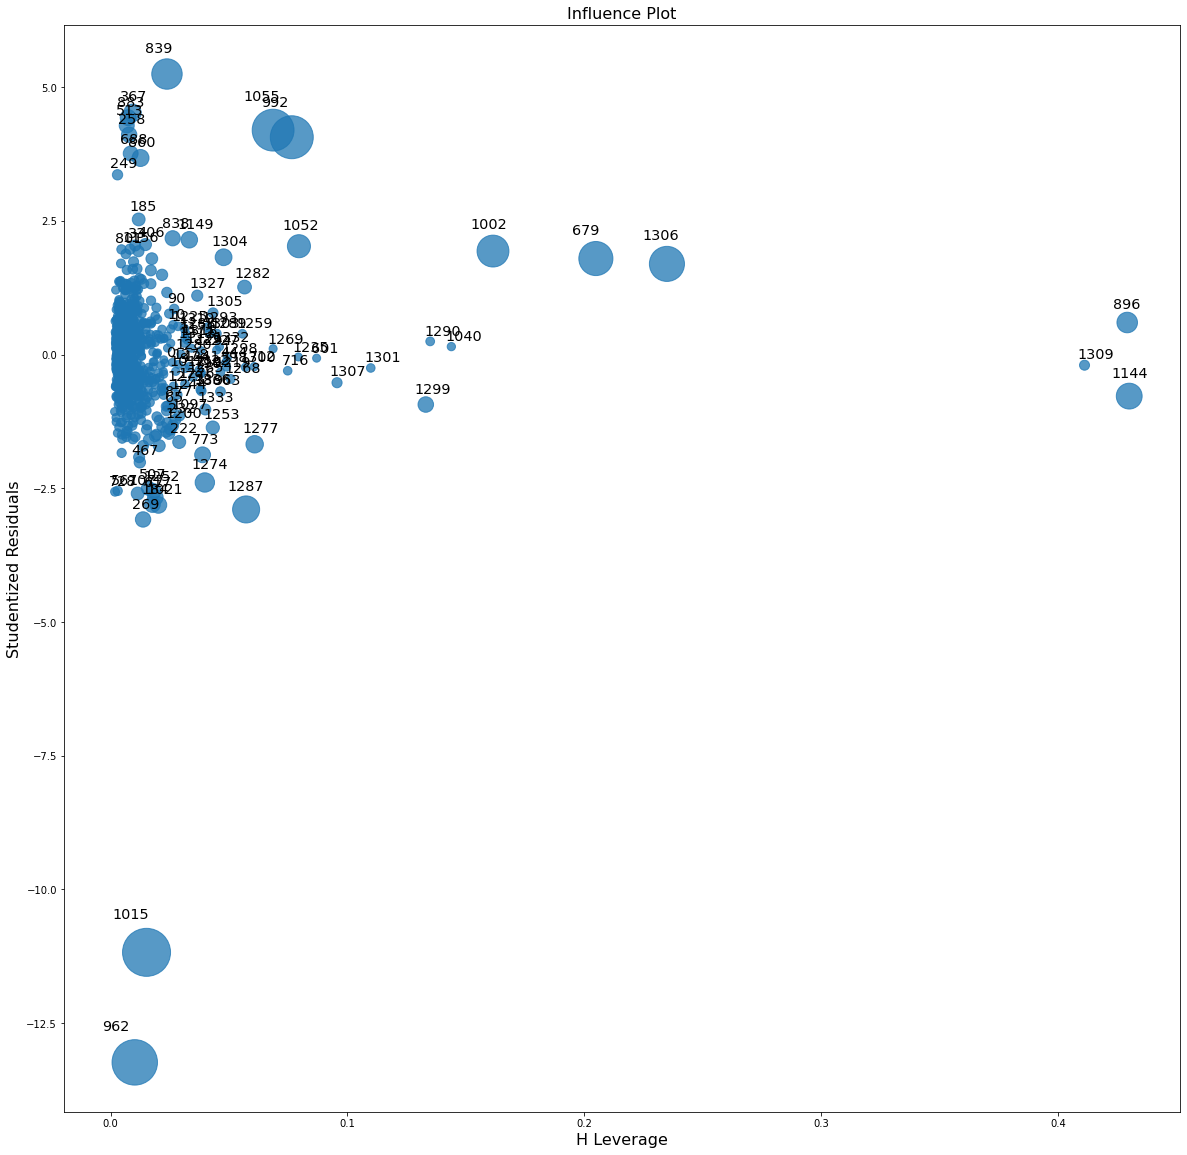

In [37]:
# PLOTTING THE INFLUNCE PLOT 

fig, ax = plt.subplots(figsize=(20,20))
# display an influence plot using Cook's distance
fig = sm.graphics.influence_plot(lm_fit_mlr, ax=ax, criterion="cooks")

__Question 6 b):__ Pairwise Plot<br>

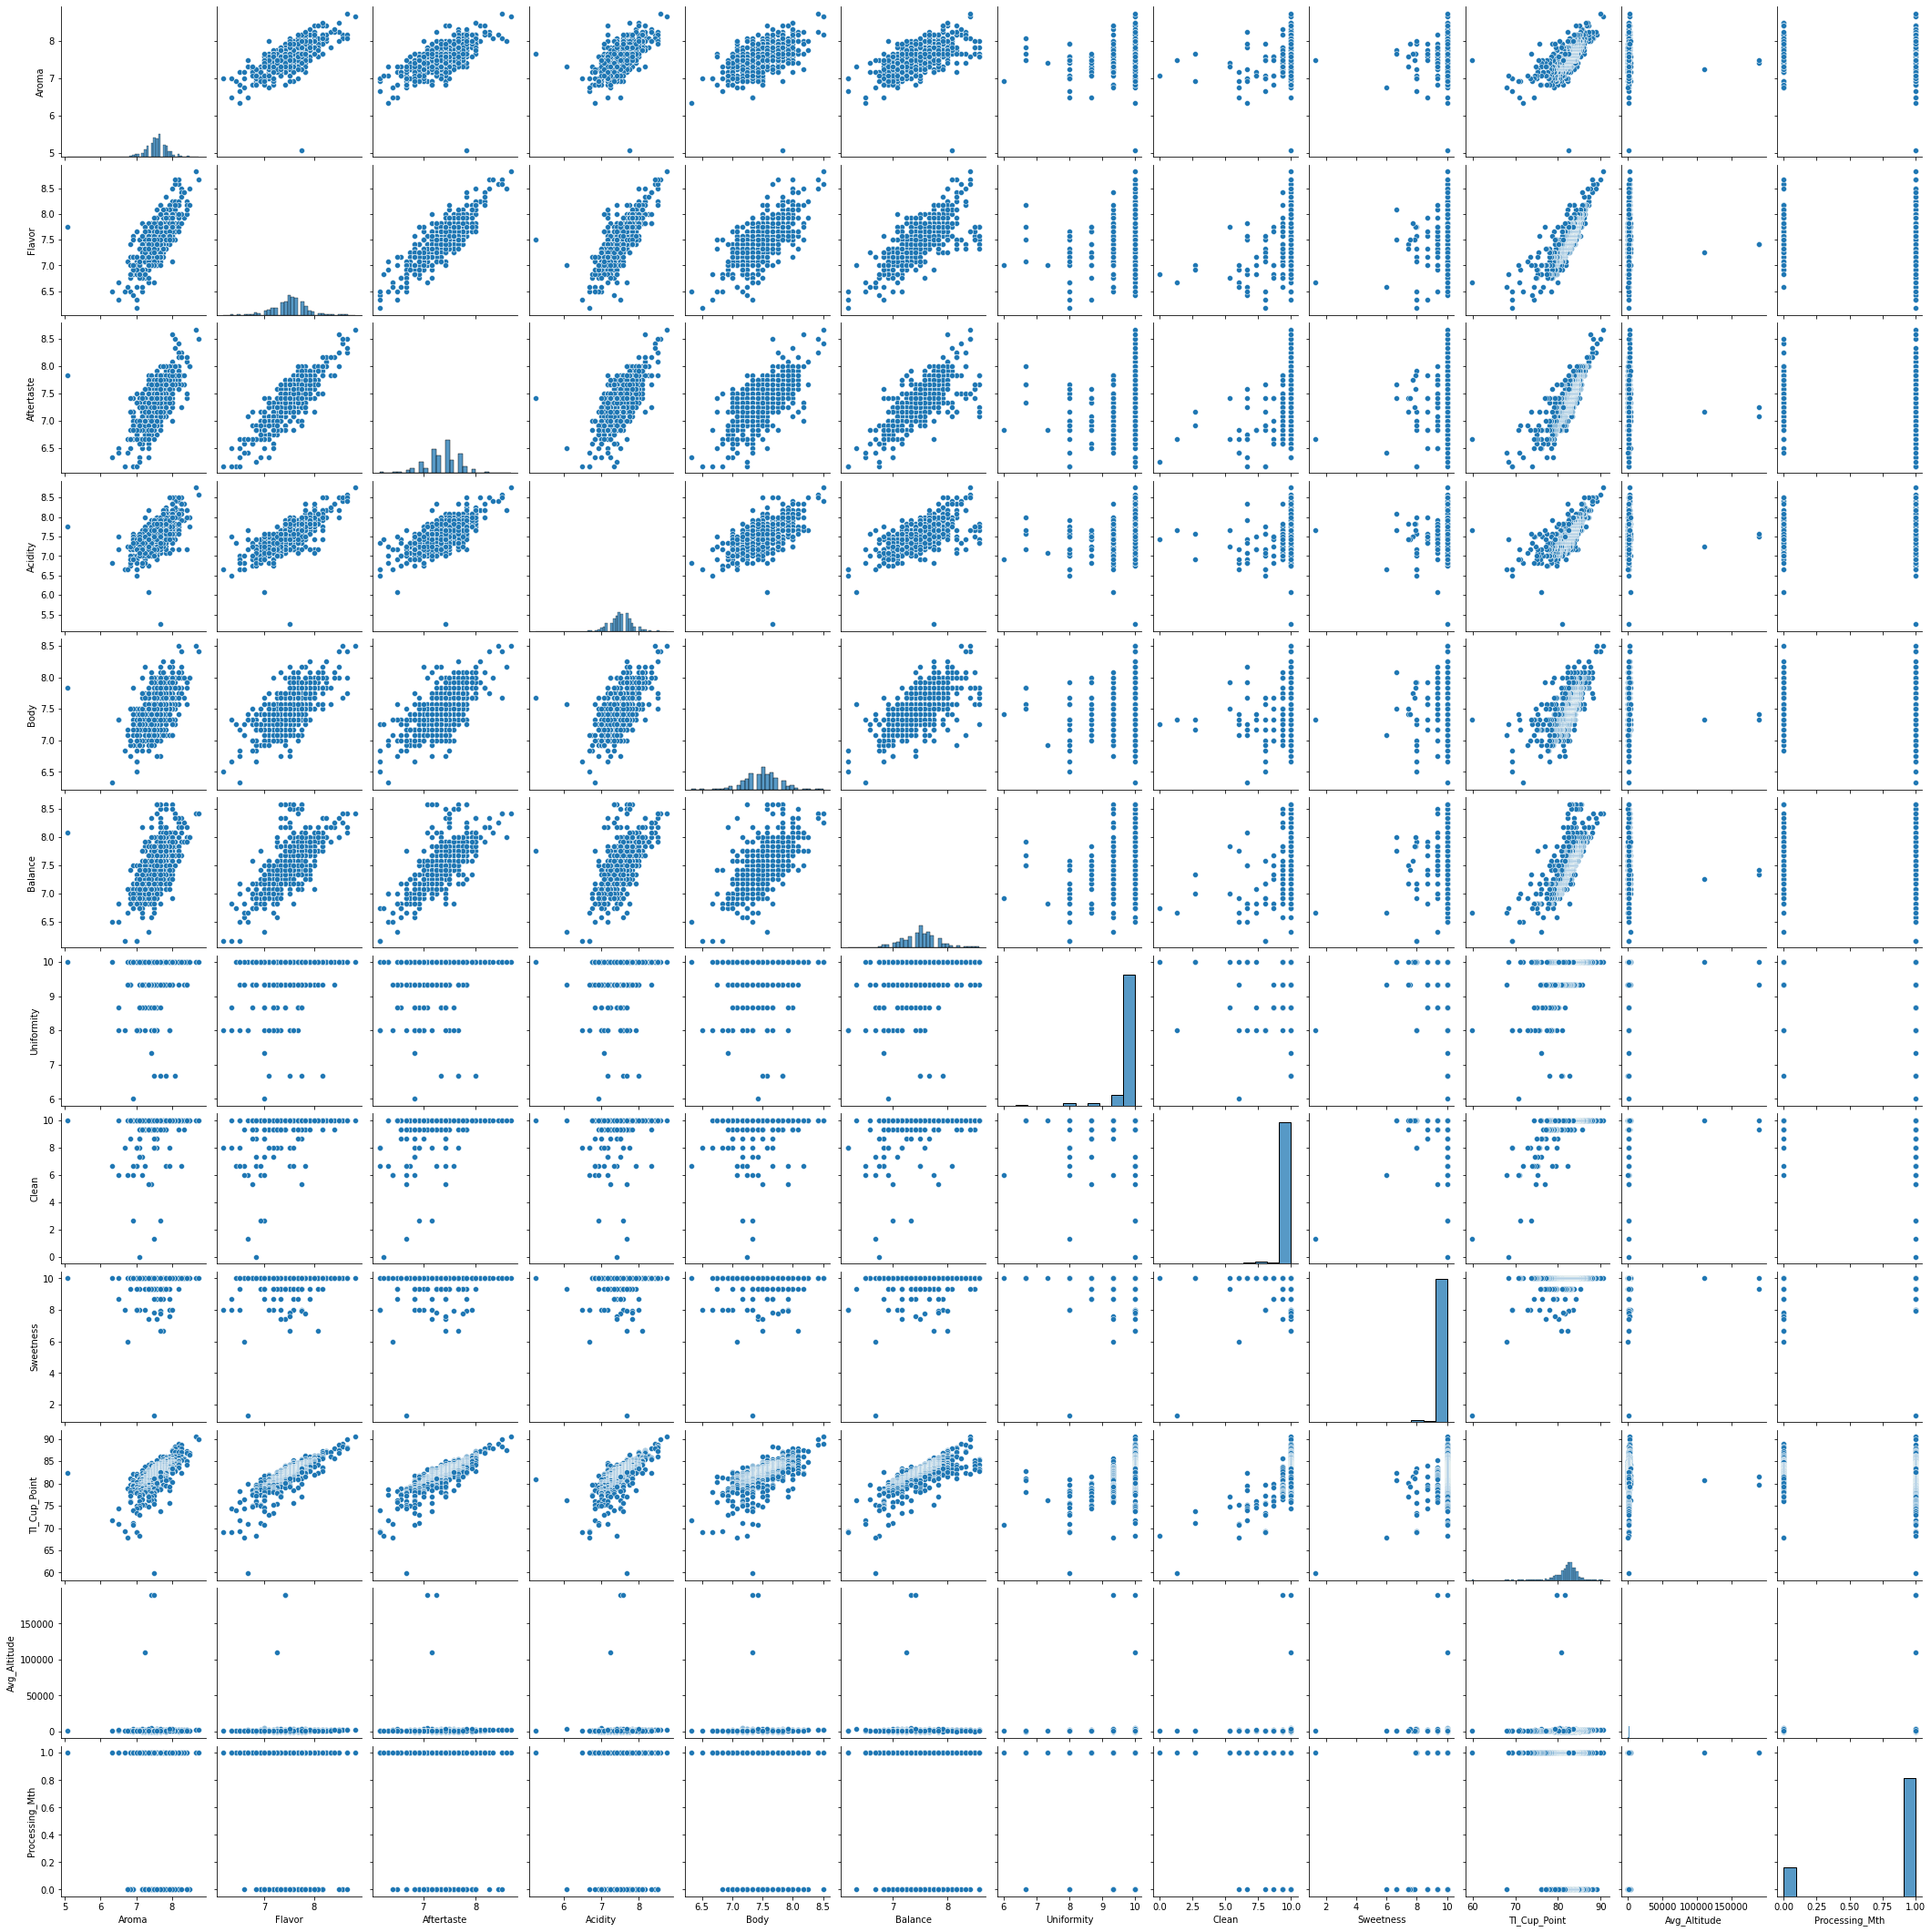

In [38]:
# PLOTTING PAIRWISE PLOT
# A pairwise plot will allow us to see the distribution of single variables and...
#..relationships between 2 variables. Also helps us to spot for the possibility of colinearity in the data. 

sns.pairplot(coffee)

__Question 6 c):__ Studentized residual vs predicted response<br>





Text(0.5, 0, 'Aroma')

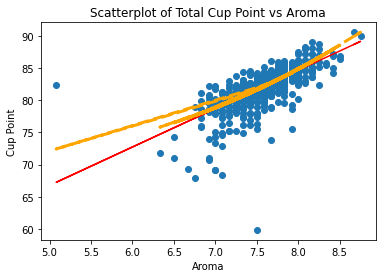

In [39]:
# STUDENTIZED RESIDUALS VS PREDICTED RESPONSE 

# STEP 1: Plot LINEAR VS QUADRATIC fit
# STEP 2: Studentized Residuals plot. 

# PURPOSE FOR DOING EACH STEP: 
# STEP 1: We do this to see if there is any indication of NON-LINEARITY. 
# This is crucial as we have assumption of LINEARITY when peforming a MLR. 

# STEP 2: Shows the studentized residuals vs predicted values.
# Used to detect outliers and assessing variance assumption

aroma_1 = smf.ols('Tl_Cup_Point~Aroma', data=coffee).fit()
aroma_2 = smf.ols('Tl_Cup_Point~Aroma+np.power(Aroma, 2)', data=coffee).fit()

plt.scatter(coffee.Aroma, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_aroma = aroma_1.predict(coffee.Aroma) # Linear regression 
y_pred2_aroma = aroma_2.predict(coffee.Aroma) # Quadratic regression 

plt.plot(coffee.Aroma, y_pred1_aroma, color="red")
plt.plot(coffee.Aroma, y_pred2_aroma, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Aroma')
plt.ylabel('Cup Point')
plt.xlabel('Aroma')

In [40]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the quadratic fit may be slightly better. 
# R-squared value for linear fit is 0.479 while quadratic fit was 0.486. 
# Quadratic fit has a sligtly higher standard error than linear fit. (0.251 vs 0.205)

aroma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Tl_Cup_Point   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     848.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          8.32e-133
Time:                        14:09:55   Log-Likelihood:                -1902.9
No. Observations:                 925   AIC:                             3810.
Df Residuals:                     923   BIC:                             3819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8785      1.554     23.734      0.000      33.829      39.928
Aroma          5.9753      0.205     29.127      0.000       5.573       6.378
==============================================================================
Omnibus:                      632.501   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29875.055
Skew:                          -2.513   Prob(JB):                         0.00
Kurtosis:                      30.384   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
aroma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Tl_Cup_Point   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     436.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.67e-134
Time:                        14:09:55   Log-Likelihood:                -1896.1
No. Observations:                 925   AIC:                             3798.
Df Residuals:                     922   BIC:                             3813.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             88.4053     14.089      6.275      0.000      60.754     116.056
Aroma                 -7.8441      3.762     -2.085      0.037     -15.226      -0.462
np.power(Aroma, 2)     0.9249      0.251      3.679      0.000       0.432       1.418
==============================================================================
Omnibus:                      697.038   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24781.330
Skew:                          -3.040   Prob(JB):                         0.00
Kurtosis:                      27.617   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0, 'Predicted Cup Point')

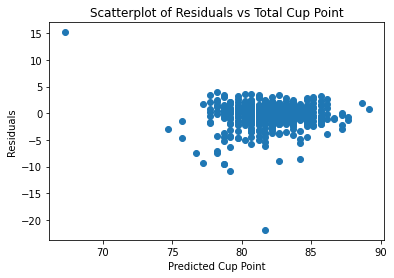

In [42]:
# Plotting residuals vs predicted Total Cup Point

aroma_fit = smf.ols('Tl_Cup_Point~Aroma', data=coffee).fit()
y_pred_ar = aroma_fit.predict(coffee.Aroma)

plt.scatter(y_pred_ar, coffee.Tl_Cup_Point-y_pred_ar)

plt.title('Scatterplot of Residuals vs Total Cup Point')
plt.ylabel('Residuals')
plt.xlabel('Predicted Cup Point')

Text(0.5, 0, 'Predicted Cup Point')

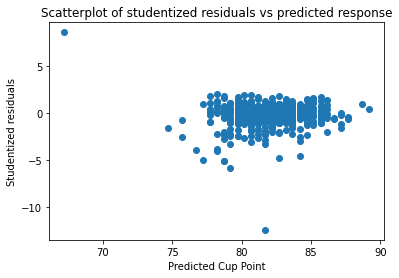

In [43]:
# Plotting STUDENTIZED residuals vs predicted Total Cup Point
# ANALYSIS: As we can see, there is a few outliers. One in the top left corner and another off right in the bottom. 
# Plot of residuals vs precited values and studentized residuals vs predicted values..
# ..look similar

import statsmodels.stats.outliers_influence
olsi = statsmodels.stats.outliers_influence.OLSInfluence(aroma_1)
olsi.summary_frame()

plt.scatter(x=y_pred_ar, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs predicted response')
plt.ylabel('Studentized residuals')
plt.xlabel('Predicted Cup Point')

Text(0.5, 0, 'Flavor')

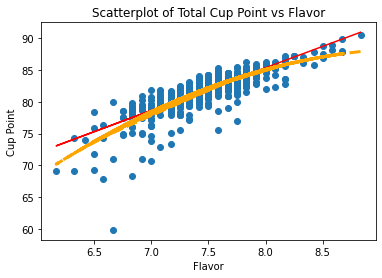

In [44]:
# Residuals plots (Flavor)

flavor_1 = smf.ols('Tl_Cup_Point~Flavor', data=coffee).fit()
flavor_2 = smf.ols('Tl_Cup_Point~Flavor+np.power(Flavor, 2)', data=coffee).fit()

plt.scatter(coffee.Flavor, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_flavor = flavor_1.predict(coffee.Flavor) # Linear regression 
y_pred2_flavor = flavor_2.predict(coffee.Flavor) # Quadratic regression 

plt.plot(coffee.Flavor, y_pred1_flavor, color="red")
plt.plot(coffee.Flavor, y_pred2_flavor, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Flavor')
plt.ylabel('Cup Point')
plt.xlabel('Flavor')

In [45]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the quadratic fit may be slightly better. 
# R-squared value for linear fit is 0.724 while quadratic fit was 0.705. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.221 vs 0.143)

#flavor_1.summary()

In [46]:
#flavor_2.summary()

Text(0.5, 0, 'predicted Cup Point')

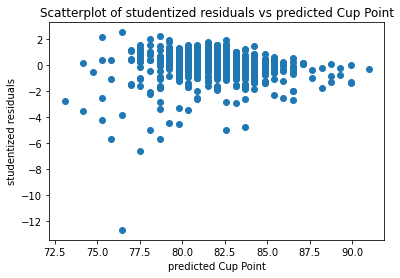

In [47]:
# Plotting STUDENTIZED residuals (Flavor)

flavor_fit = smf.ols('Tl_Cup_Point~Flavor', data=coffee).fit()
y_pred_ar = flavor_fit.predict(coffee.Flavor)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(flavor_1)
olsi.summary_frame()

plt.scatter(x=y_pred_ar, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs predicted Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Aftertaste')

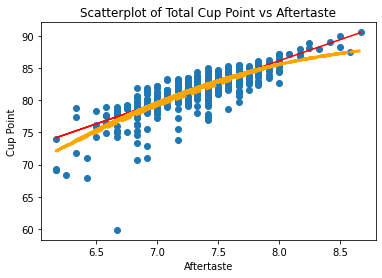

In [48]:
# Residuals plots (Aftertaste)

aftaste_1 = smf.ols('Tl_Cup_Point~Aftertaste', data=coffee).fit()
aftaste_2 = smf.ols('Tl_Cup_Point~Aftertaste+np.power(Aftertaste, 2)', data=coffee).fit()

plt.scatter(coffee.Aftertaste, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_aftaste = aftaste_1.predict(coffee.Aftertaste) # Linear regression 
y_pred2_aftaste = aftaste_2.predict(coffee.Aftertaste) # Quadratic regression 

plt.plot(coffee.Aftertaste, y_pred1_aftaste, color="red")
plt.plot(coffee.Aftertaste, y_pred2_aftaste, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Aftertaste')
plt.ylabel('Cup Point')
plt.xlabel('Aftertaste')

In [49]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the quadratic fit may be slightly better. 
# R-squared value for linear fit is 0.702 while quadratic fit was 0.719. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.231 vs 0.140)

#aftaste_1.summary()

In [50]:
#aftaste_2.summary()

Text(0.5, 0, 'predicted Cup Point')

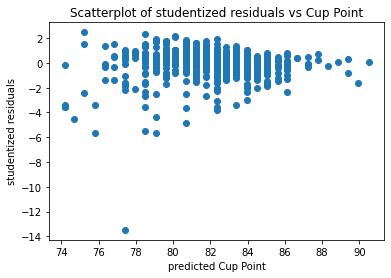

In [51]:
# Plotting STUDENTIZED residuals (Aftertaste)

aftaste_fit = smf.ols('Tl_Cup_Point~Aftertaste', data=coffee).fit()
y_pred_taste = aftaste_fit.predict(coffee.Aftertaste)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(aftaste_1)
olsi.summary_frame()

plt.scatter(x=y_pred_taste, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Acidity')

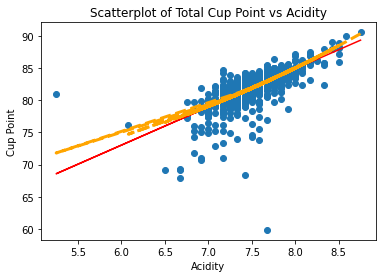

In [52]:
# Residuals plots (Acidity)

Acidity_1 = smf.ols('Tl_Cup_Point~Acidity', data=coffee).fit()
Acidity_2 = smf.ols('Tl_Cup_Point~Acidity+np.power(Acidity, 2)', data=coffee).fit()

plt.scatter(coffee.Acidity, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_Acidity = Acidity_1.predict(coffee.Acidity) # Linear regression 
y_pred2_Acidity = Acidity_2.predict(coffee.Acidity) # Quadratic regression 

plt.plot(coffee.Acidity, y_pred1_Acidity, color="red")
plt.plot(coffee.Acidity, y_pred2_Acidity, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Acidity')
plt.ylabel('Cup Point')
plt.xlabel('Acidity')

In [53]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the quadratic fit may be slightly better. 
# R-squared value for linear fit is 0.491 while quadratic fit was 0.494. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.264 vs 0.199)

#Acidity_1.summary()

In [54]:
#Acidity_2.summary()

Text(0.5, 0, 'predicted Cup Point')

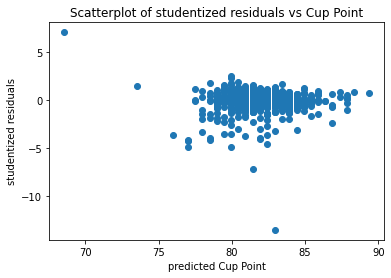

In [55]:
# Plotting STUDENTIZED residuals (Acidity)

acidity_fit = smf.ols('Tl_Cup_Point~Acidity', data=coffee).fit()
y_pred_acid = acidity_fit.predict(coffee.Acidity)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(Acidity_1)
olsi.summary_frame()

plt.scatter(x=y_pred_acid, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Body')

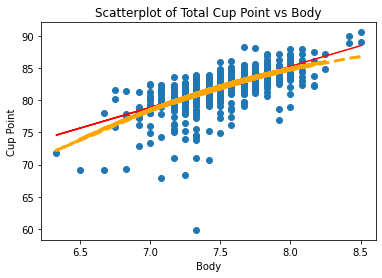

In [56]:
# Residuals plots (Body)

Body_1 = smf.ols('Tl_Cup_Point~Body', data=coffee).fit()
Body_2 = smf.ols('Tl_Cup_Point~Body+np.power(Body, 2)', data=coffee).fit()

plt.scatter(coffee.Body, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_Body = Body_1.predict(coffee.Body) # Linear regression 
y_pred2_Body = Body_2.predict(coffee.Body) # Quadratic regression 

plt.plot(coffee.Body, y_pred1_Body, color="red")
plt.plot(coffee.Body, y_pred2_Body, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Body')
plt.ylabel('Cup Point')
plt.xlabel('Body')

In [57]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the quadratic fit may be slightly better. 
# R-squared value for linear fit is 0.444 while quadratic fit was 0.451. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.517 vs 0.236)

#Body_1.summary()

In [58]:
#Body_2.summary()

Text(0.5, 0, 'predicted Cup Point')

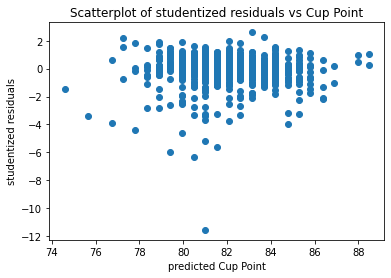

In [59]:
# Plotting STUDENTIZED residuals (Body)

body_fit = smf.ols('Tl_Cup_Point~Body', data=coffee).fit()
y_pred_body = body_fit.predict(coffee.Body)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(Body_1)
olsi.summary_frame()

plt.scatter(x=y_pred_body, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Balance')

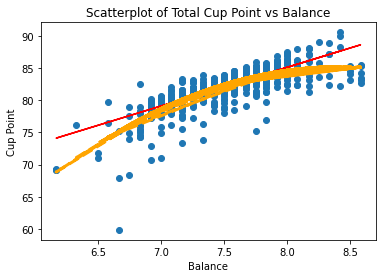

In [60]:
# Residuals plots (Balance)

Balance_1 = smf.ols('Tl_Cup_Point~Balance', data=coffee).fit()
Balance_2 = smf.ols('Tl_Cup_Point~Balance+np.power(Balance, 2)', data=coffee).fit()

plt.scatter(coffee.Balance, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_Balance = Balance_1.predict(coffee.Balance) # Linear regression 
y_pred2_Balance = Balance_2.predict(coffee.Balance) # Quadratic regression 

plt.plot(coffee.Balance, y_pred1_Balance, color="red")
plt.plot(coffee.Balance, y_pred2_Balance, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Balance')
plt.ylabel('Cup Point')
plt.xlabel('Balance')

In [61]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the quadratic fit may be slightly better. 
# R-squared value for linear fit is 0.611 while quadratic fit was 0.676. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.238 vs 0.158)

#Balance_1.summary()

In [62]:
#Balance_2.summary()

Text(0.5, 0, 'predicted Cup Point')

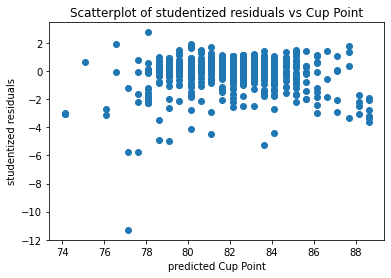

In [63]:
# Plotting STUDENTIZED residuals (Balance)

Balance_fit = smf.ols('Tl_Cup_Point~Balance', data=coffee).fit()
y_pred_Balance = Balance_fit.predict(coffee.Balance)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(Balance_1)
olsi.summary_frame()

plt.scatter(x=y_pred_Balance, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Uniformity')

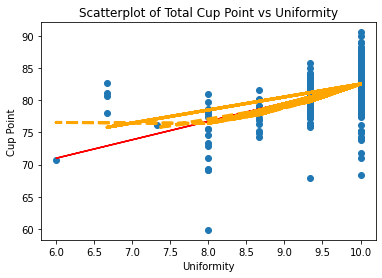

In [64]:
# Residuals plots (Uniformity)

Uniformity_1 = smf.ols('Tl_Cup_Point~Uniformity', data=coffee).fit()
Uniformity_2 = smf.ols('Tl_Cup_Point~Uniformity+np.power(Uniformity, 2)', data=coffee).fit()

plt.scatter(coffee.Uniformity, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_Uniformity = Uniformity_1.predict(coffee.Uniformity) # Linear regression 
y_pred2_Uniformity = Uniformity_2.predict(coffee.Uniformity) # Quadratic regression 

plt.plot(coffee.Uniformity, y_pred1_Uniformity, color="red")
plt.plot(coffee.Uniformity, y_pred2_Uniformity, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Uniformity')
plt.ylabel('Cup Point')
plt.xlabel('Uniformity')

In [65]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the linear fit may be slightly better. 

# R-squared value for linear fit is 0.229 while quadratic fit was 0.248. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.162 vs 0.173)

#Uniformity_1.summary()

In [66]:
#Uniformity_2.summary()

Text(0.5, 0, 'predicted Cup Point')

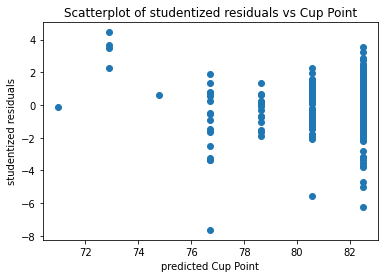

In [67]:
# Plotting STUDENTIZED residuals (Uniformity)

Uniformity_fit = smf.ols('Tl_Cup_Point~Uniformity', data=coffee).fit()
y_pred_Uniformity = Uniformity_fit.predict(coffee.Uniformity)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(Uniformity_1)
olsi.summary_frame()

plt.scatter(x=y_pred_Uniformity, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Clean')

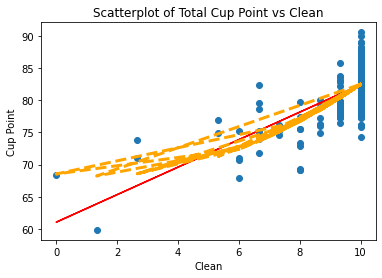

In [68]:
# Residuals plots (Clean)

Clean_1 = smf.ols('Tl_Cup_Point~Clean', data=coffee).fit()
Clean_2 = smf.ols('Tl_Cup_Point~Clean+np.power(Clean, 2)', data=coffee).fit()

plt.scatter(coffee.Clean, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_Clean = Clean_1.predict(coffee.Clean) # Linear regression 
y_pred2_Clean = Clean_2.predict(coffee.Clean) # Quadratic regression 

plt.plot(coffee.Clean, y_pred1_Clean, color="red")
plt.plot(coffee.Clean, y_pred2_Clean, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Clean')
plt.ylabel('Cup Point')
plt.xlabel('Clean')

In [69]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the linear fit may be slightly better. 

# R-squared value for linear fit is 0.389 while quadratic fit was 0.414. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.029 vs 0.088)

#Clean_1.summary()

In [70]:
#Clean_2.summary()

Text(0.5, 0, 'predicted Cup Point')

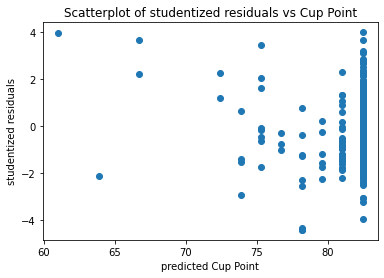

In [71]:
# Plotting STUDENTIZED residuals (Clean)

Clean_fit = smf.ols('Tl_Cup_Point~Clean', data=coffee).fit()
y_pred_Clean = Clean_fit.predict(coffee.Clean)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(Clean_1)
olsi.summary_frame()

plt.scatter(x=y_pred_Clean, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Sweetness')

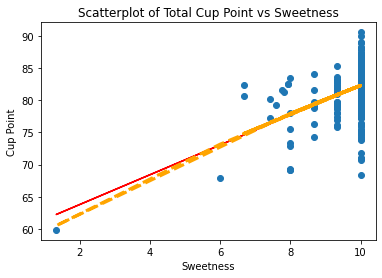

In [72]:
# Residuals plots (Sweetness)

Sweetness_1 = smf.ols('Tl_Cup_Point~Sweetness', data=coffee).fit()
Sweetness_2 = smf.ols('Tl_Cup_Point~Sweetness+np.power(Sweetness, 2)', data=coffee).fit()

plt.scatter(coffee.Sweetness, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_Sweetness = Sweetness_1.predict(coffee.Sweetness) # Linear regression 
y_pred2_Sweetness = Sweetness_2.predict(coffee.Sweetness) # Quadratic regression 

plt.plot(coffee.Sweetness, y_pred1_Sweetness, color="red")
plt.plot(coffee.Sweetness, y_pred2_Sweetness, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Sweetness')
plt.ylabel('Cup Point')
plt.xlabel('Sweetness')

In [73]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the linear fit may be slightly better. 

# R-squared value for linear fit is 0.170 while quadratic fit was 0.171. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.054 vs 0.169)

#Sweetness_1.summary()

In [74]:
#Sweetness_2.summary()

Text(0.5, 0, 'predicted Cup Point')

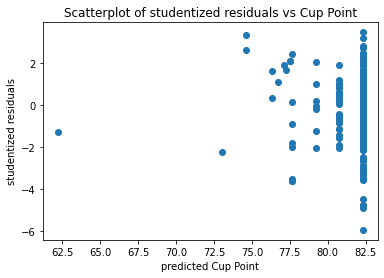

In [75]:
# Plotting STUDENTIZED residuals (Sweetness)

Sweetness_fit = smf.ols('Tl_Cup_Point~Sweetness', data=coffee).fit()
y_pred_Sweetness = Sweetness_fit.predict(coffee.Sweetness)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(Sweetness_1)
olsi.summary_frame()

plt.scatter(x=y_pred_Sweetness, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Avg_Altitude')

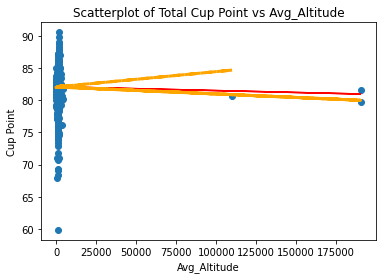

In [76]:
# Residuals plots (Avg_Altitude)

alt_1 = smf.ols('Tl_Cup_Point~Avg_Altitude', data=coffee).fit()
alt_2 = smf.ols('Tl_Cup_Point~Avg_Altitude+np.power(Avg_Altitude, 2)', data=coffee).fit()

plt.scatter(coffee.Avg_Altitude, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_alt = alt_1.predict(coffee.Avg_Altitude) # Linear regression 
y_pred2_alt = alt_2.predict(coffee.Avg_Altitude) # Quadratic regression 

plt.plot(coffee.Avg_Altitude, y_pred1_alt, color="red")
plt.plot(coffee.Avg_Altitude, y_pred2_alt, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Avg_Altitude')
plt.ylabel('Cup Point')
plt.xlabel('Avg_Altitude')

In [77]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the linear fit may be slightly better. 

# R-squared value for linear fit is 0.00 while quadratic fit was 0.003. 

#alt_1.summary()

In [78]:
#alt_2.summary()

Text(0.5, 0, 'predicted Cup Point')

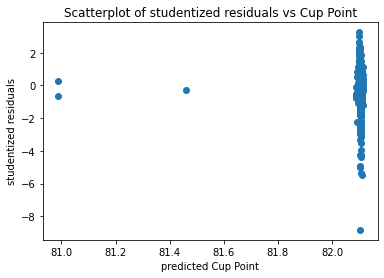

In [79]:
# Plotting STUDENTIZED residuals (Avg_Altitude)

alt_fit = smf.ols('Tl_Cup_Point~Avg_Altitude', data=coffee).fit()
y_pred_alt = alt_fit.predict(coffee.Avg_Altitude)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(alt_1)
olsi.summary_frame()

plt.scatter(x=y_pred_alt, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

Text(0.5, 0, 'Processing_Mth')

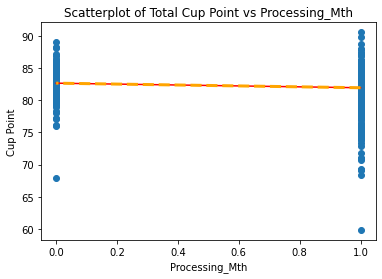

In [80]:
# Residuals plots (Processing_Mth)

Process_1 = smf.ols('Tl_Cup_Point~Processing_Mth', data=coffee).fit()
Process_2 = smf.ols('Tl_Cup_Point~Processing_Mth+np.power(Processing_Mth, 2)', data=coffee).fit()

plt.scatter(coffee.Processing_Mth, coffee.Tl_Cup_Point)

# Creating a prediction variable for the trained model 
y_pred1_Process = Process_1.predict(coffee.Processing_Mth) # Linear regression 
y_pred2_Process = Process_2.predict(coffee.Processing_Mth) # Quadratic regression 

plt.plot(coffee.Processing_Mth, y_pred1_Process, color="red")
plt.plot(coffee.Processing_Mth, y_pred2_Process, color="orange", linestyle="--", linewidth="3")

plt.title('Scatterplot of Total Cup Point vs Processing_Mth')
plt.ylabel('Cup Point')
plt.xlabel('Processing_Mth')

In [81]:
# ANALYSIS: BASED ON Plotted scatterplot, it appears that the linear fit may be slightly better. 

# R-squared value for linear and quadratic fit is 0.012. 
# Quadratic fit has a slighty higher standard error than linear fit. (0.107 vs 0.215)

#Process_1.summary()

In [82]:
#Process_2.summary()

Text(0.5, 0, 'predicted Cup Point')

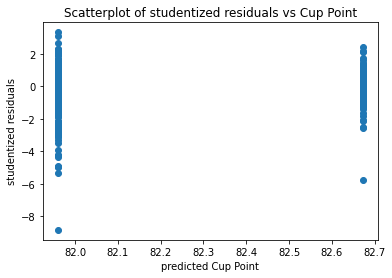

In [83]:
# Plotting STUDENTIZED residuals (Processing_Mth)

Process_fit = smf.ols('Tl_Cup_Point~Processing_Mth', data=coffee).fit()
y_pred_Process = Process_fit.predict(coffee.Processing_Mth)

olsi = statsmodels.stats.outliers_influence.OLSInfluence(Process_1)
olsi.summary_frame()

plt.scatter(x=y_pred_Process, y=olsi.summary_frame().student_resid)

plt.title('Scatterplot of studentized residuals vs Cup Point')
plt.ylabel('studentized residuals')
plt.xlabel('predicted Cup Point')

__Question 6 d):__ QQ Plot<br>
After performing there plots, we find the following data to not be normally distrubuted:<br>
Uniformity, Clean, Sweetness, Altitude, Process <br>
Heteroscedasticity may be present in these predictors

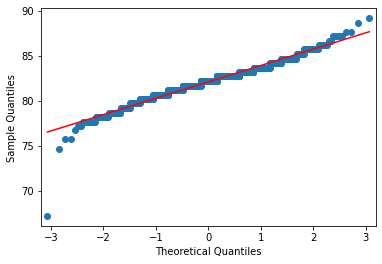

In [84]:
# Aroma
sm.qqplot(y_pred1_aroma,line='s')
pylab.show()

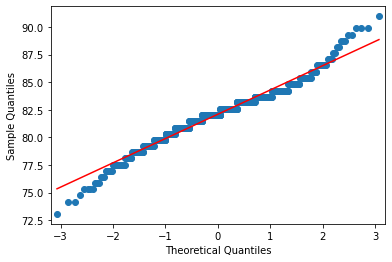

In [85]:
# Flavor
sm.qqplot(y_pred1_flavor,line='s')
pylab.show()

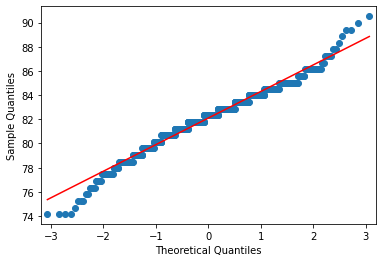

In [86]:
# Aftertaste
sm.qqplot(y_pred1_aftaste,line='s')
pylab.show()

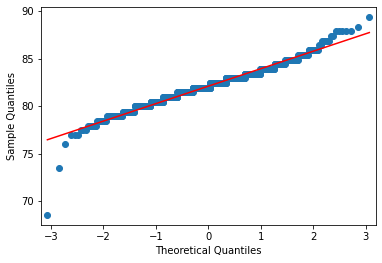

In [87]:
# Acididy
sm.qqplot(y_pred1_Acidity,line='s')
pylab.show()

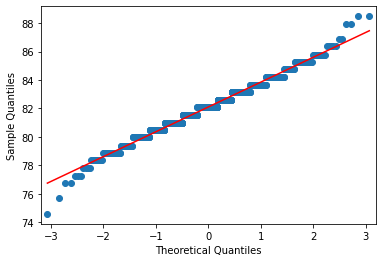

In [88]:
# Body
sm.qqplot(y_pred1_Body,line='s')
pylab.show()

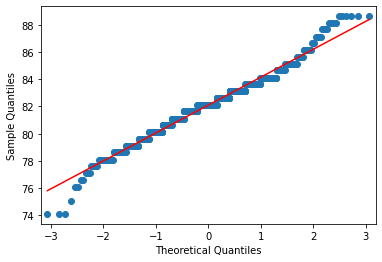

In [89]:
# Balance
sm.qqplot(y_pred1_Balance,line='s')
pylab.show()

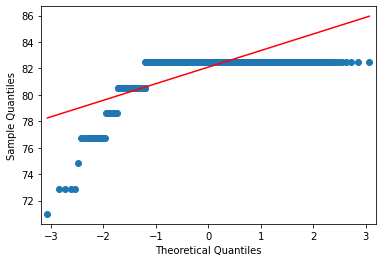

In [90]:
# Uniformity
sm.qqplot(y_pred1_Uniformity,line='s')
pylab.show()

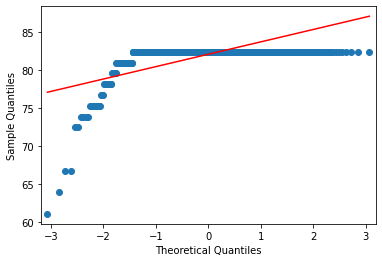

In [91]:
# Clean
sm.qqplot(y_pred1_Clean,line='s')
pylab.show()

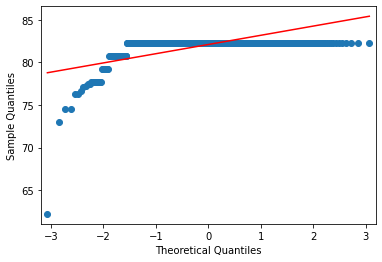

In [92]:
# Sweetness
sm.qqplot(y_pred1_Sweetness,line='s')
pylab.show()

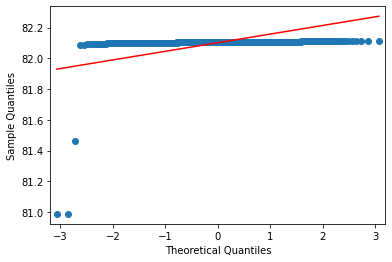

In [93]:
# Altitude
sm.qqplot(y_pred1_alt,line='s')
pylab.show()

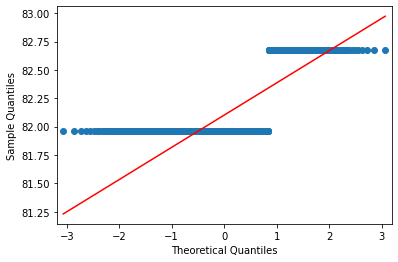

In [94]:
# Process
sm.qqplot(y_pred1_Process,line='s')
pylab.show()

__Question 7:__ Correlation Matrix<br>
We can see that the top  left corner is lighter in color, which suggest high correlation for those variables (>0.5).<br>

We notice the following to be especially correlated (>0.7):<br>
Aftertaste & Flavor: 0.85 <br>
Acidity & Flavor: 0.85<br>
Balance & Flavor: 0.74<br>
Balance & Aftertaste: 0.77 <br>

__Note the correlation to our response variable (Total Cup Point)__

<AxesSubplot:>

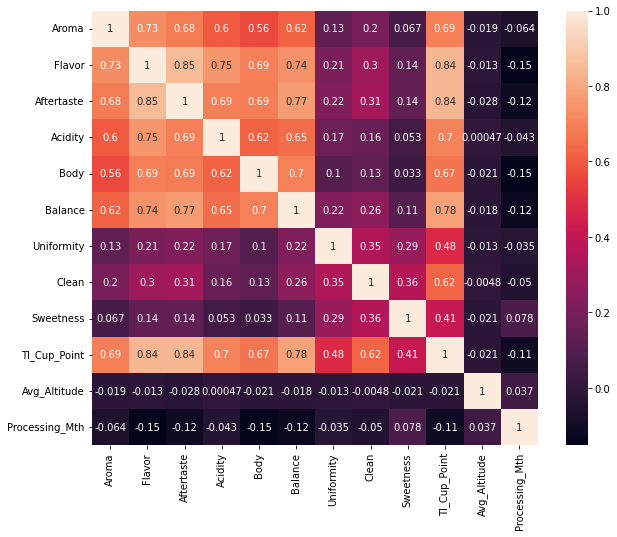

In [95]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(coffee.corr(),annot=True)

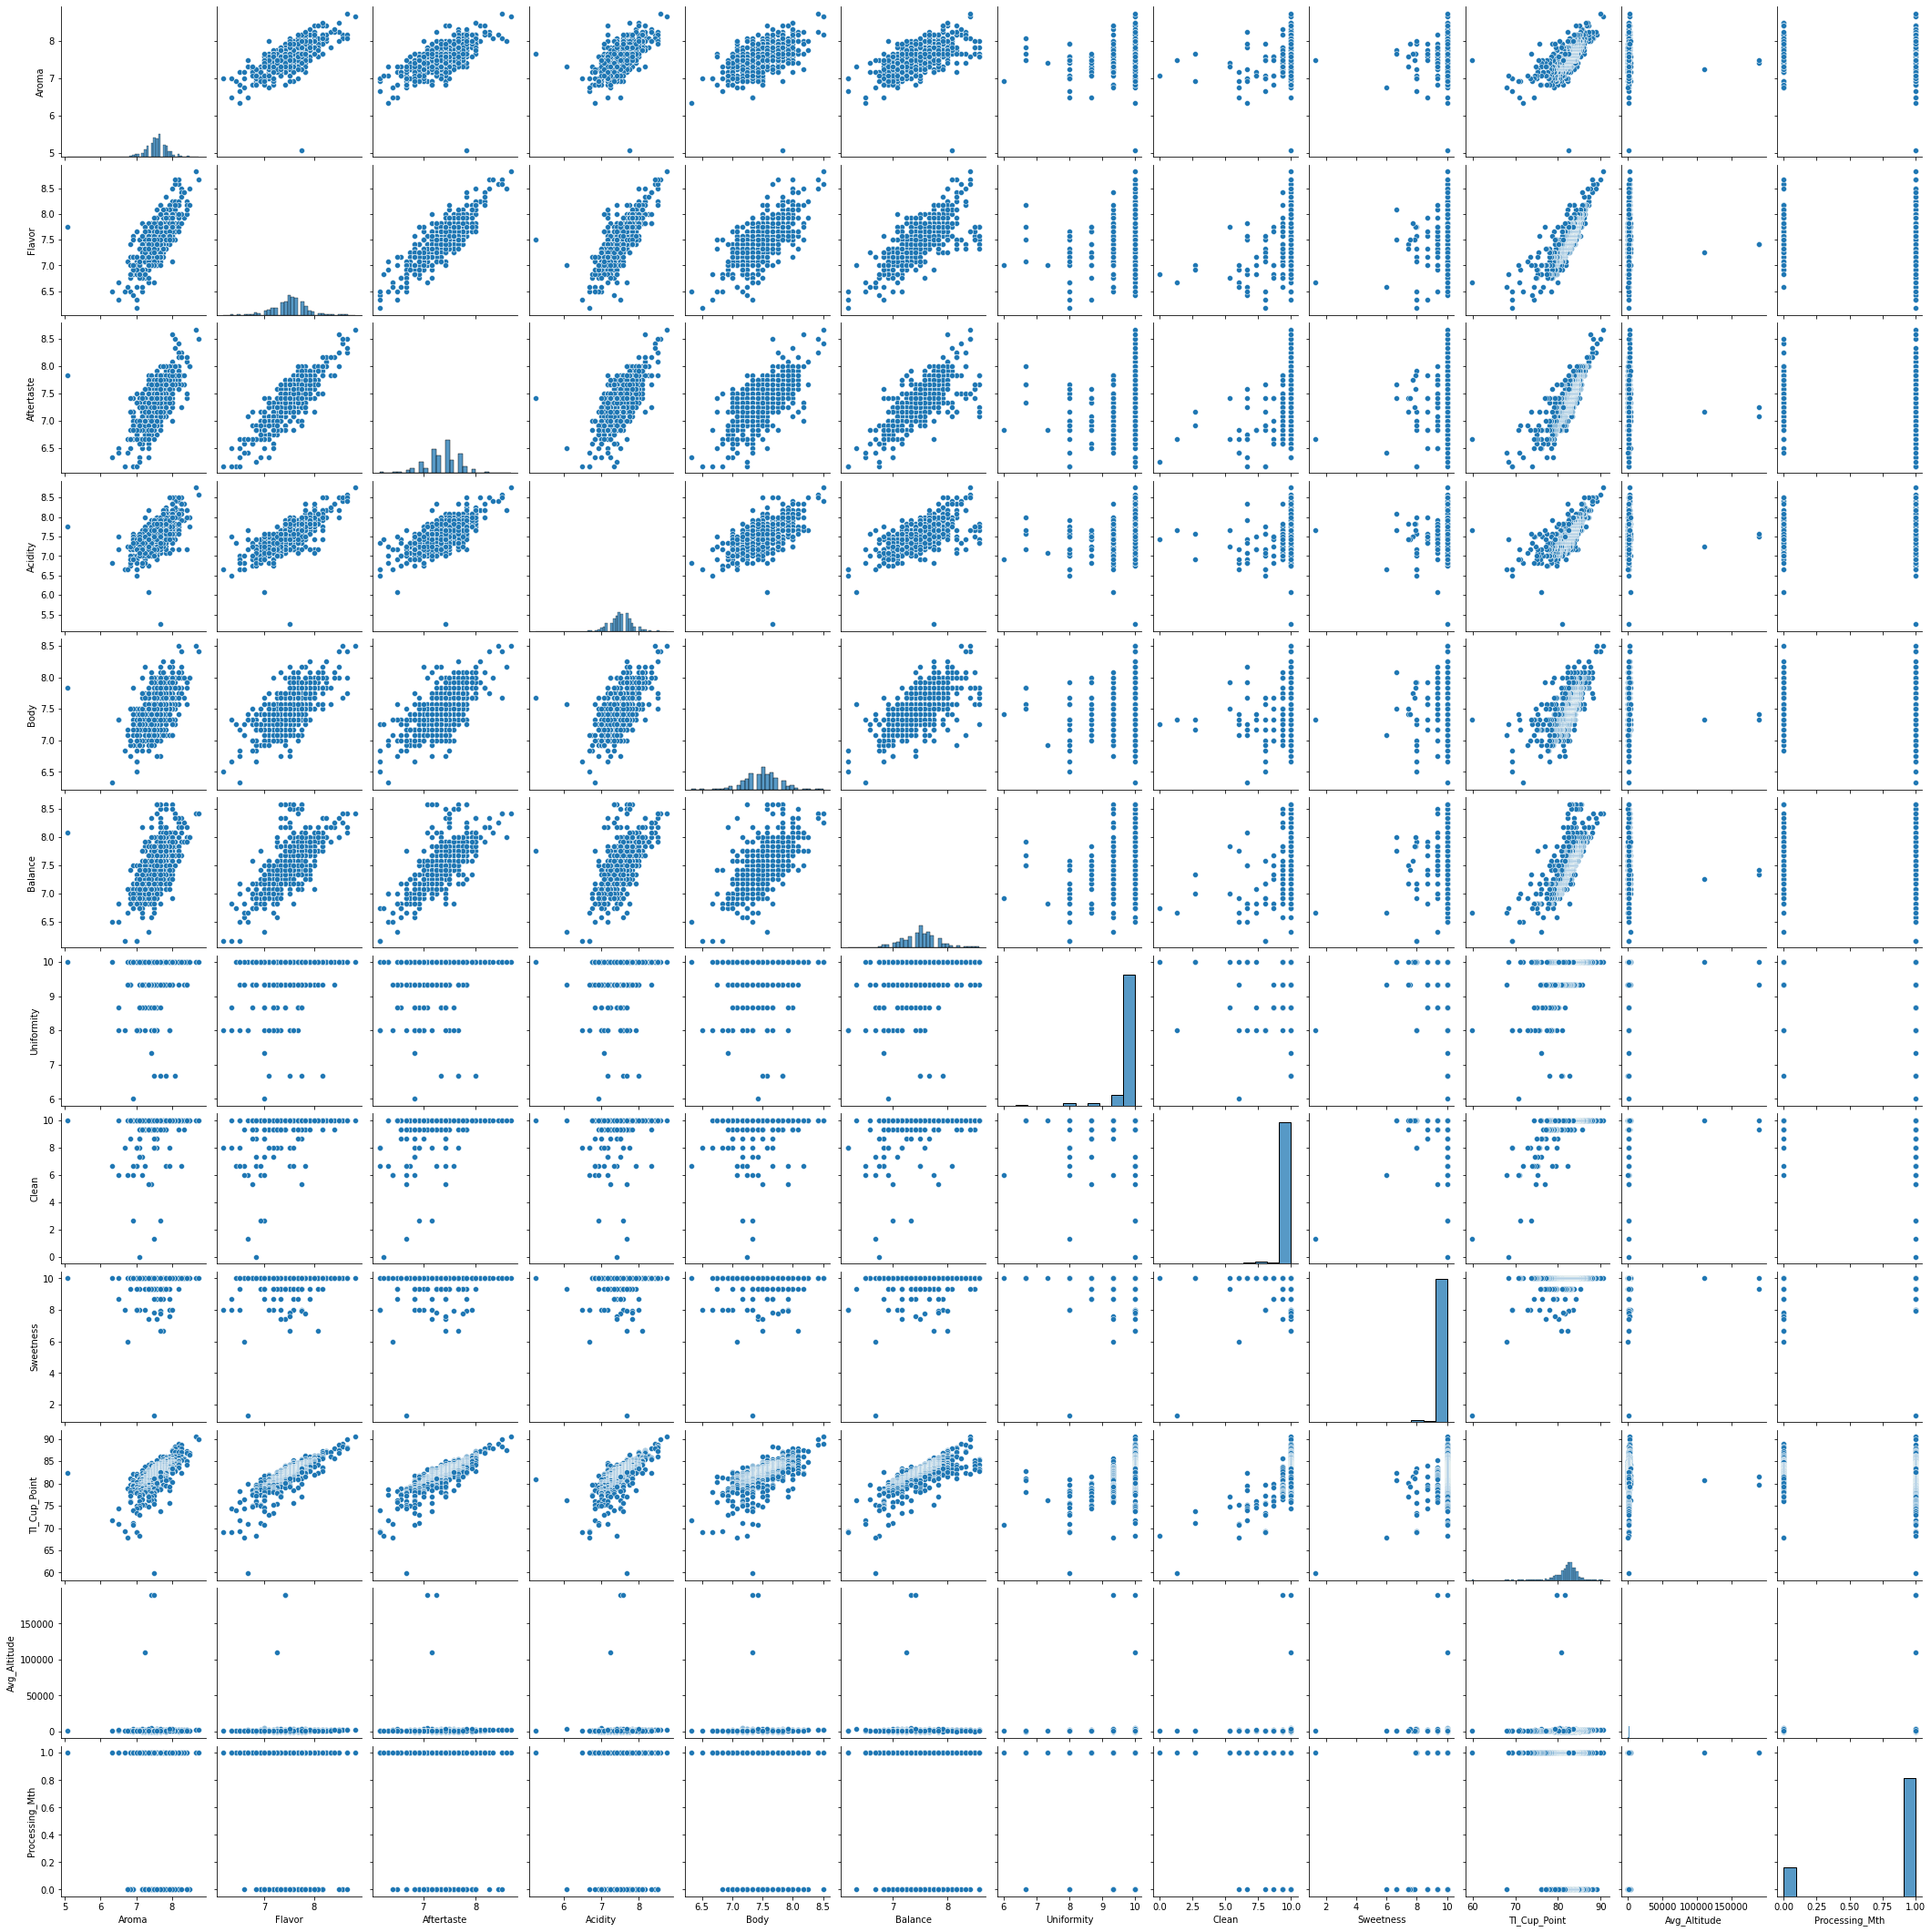

In [96]:
# We notice a similar pattern with the pairwise plot
sns.pairplot(coffee)

__Question 8:__ Compute PCA and sample variance<br>


In [97]:
# Finding eigenvalues and eigenvectors 

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(coffee)

In [98]:
# Using PCA to get the components. We have a lot of features in the dataset. 
# Let us apply PCA using 2 principal components.
# We first scale our data and then obtain the eigenvectors and eigenvalues. 

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [99]:
# Eigenvectors
components = pca.components_
print(components)

[[-0.33143661 -0.38853721 -0.38432622 -0.33877869 -0.33042321 -0.36294176
  -0.14725813 -0.18431715 -0.10282732 -0.40686015  0.01124553  0.06254489]
 [ 0.15355757  0.10619251  0.08506509  0.17764694  0.2321843   0.11018924
  -0.47730069 -0.51040534 -0.56017643 -0.21302232  0.0123244  -0.11242737]]


In [100]:
# Eigenvalues 
# This gives us the variance
# The first eigenvalue is larger, 
# which suggests to us that most of the variation is in the x-axis.
variances = pca.explained_variance_
print(variances)

[5.56166868 1.62868463]


In [101]:
# Condition number 
cond_num = np.sqrt(variances[0]/variances[1])
cond_num

1.8479237961621062

In [102]:
x_pca = pca.transform(scaled_data)
x_pca.shape

(925, 2)

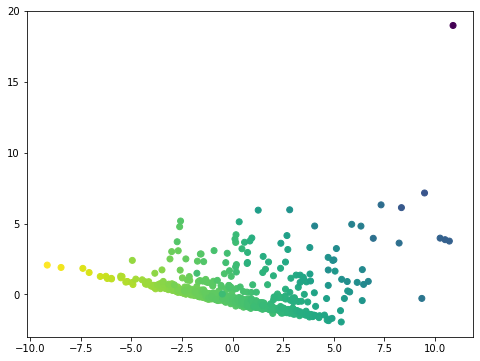

In [103]:
# From the figure we see that there is a more variation at the bottom. 
# However our plot also suggest that there is collinearity/multicollinearity due to the 
# scattering of the plots. 

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=coffee['Tl_Cup_Point'])

__Question 9:__ Obtain PC estimates of the coefficients

In [104]:
# Standardizing the predictors. Subtracting the mean and dividing by std. 
aroma_std      =  (coffee['Aroma'] - np.mean(coffee['Aroma']))/np.std(coffee['Aroma'], ddof=1)
flavor_std     =  (coffee['Flavor'] - np.mean(coffee['Flavor']))/np.std(coffee['Flavor'], ddof=1)
aftertaste_std =  (coffee['Aftertaste'] - np.mean(coffee['Aftertaste']))/np.std(coffee['Aftertaste'], ddof=1)
acidity_std    =  (coffee['Acidity'] - np.mean(coffee['Acidity']))/np.std(coffee['Acidity'], ddof=1)
body_std       =  (coffee['Body'] - np.mean(coffee['Body']))/np.std(coffee['Body'], ddof=1)
balance_std    =  (coffee['Balance'] - np.mean(coffee['Balance']))/np.std(coffee['Balance'], ddof=1)
uniformity_std =  (coffee['Uniformity'] - np.mean(coffee['Uniformity']))/np.std(coffee['Uniformity'], ddof=1)
clean_std      =  (coffee['Clean'] - np.mean(coffee['Clean']))/np.std(coffee['Clean'], ddof=1)
sweetness_std  =  (coffee['Sweetness'] - np.mean(coffee['Sweetness']))/np.std(coffee['Sweetness'], ddof=1)
process_std    =  (coffee['Processing_Mth'] - np.mean(coffee['Processing_Mth']))/np.std(coffee['Processing_Mth'], ddof=1)


In [105]:
# We will use the second eigenvector above to create PCs C1 and C2
C1 = (-0.33143661*aroma_std)+(-0.38853721*flavor_std)+(-0.38432622*aftertaste_std)+(-0.33877869*acidity_std)+(-0.33042321*body_std)+(-0.36294176*balance_std)+(-0.14725813*uniformity_std)+(-0.18431715*clean_std)+(-0.10282732*sweetness_std)+(0.06254489*process_std)
C2 = (0.15355757*aroma_std)+(0.10619251*flavor_std)+(0.08506509*aftertaste_std)+(0.17764694*acidity_std)+(0.2321843*body_std)+(0.11018924*balance_std)+(-0.47730069*uniformity_std)+(-0.51040534*clean_std)+(-0.56017643*sweetness_std)+(-0.11242737*process_std)
     
PC_vals=np.transpose(pd.DataFrame([C1, C2]))


In [106]:
# Creating standardized response 

Y_standardized = (coffee['Tl_Cup_Point'] - np.mean(coffee['Tl_Cup_Point']))/np.std(coffee['Tl_Cup_Point'], ddof=1)
df_standardized = pd.DataFrame([Y_standardized])


In [107]:
# Find coefficient of C1
results_C1 = sm.OLS(Y_standardized, C1).fit()
print(results_C1.summary())

                                 OLS Regression Results                                
Dep. Variable:           Tl_Cup_Point   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              7113.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                        0.00
Time:                        14:11:17   Log-Likelihood:                         -311.58
No. Observations:                 925   AIC:                                      625.2
Df Residuals:                     924   BIC:                                      630.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [108]:
# Find coefficient of C2
results_C2 = sm.OLS(Y_standardized, C2).fit()
print(results_C2.summary())

                                 OLS Regression Results                                
Dep. Variable:           Tl_Cup_Point   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              10.89
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                     0.00100
Time:                        14:11:18   Log-Likelihood:                         -1306.6
No. Observations:                 925   AIC:                                      2615.
Df Residuals:                     924   BIC:                                      2620.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [109]:
# Solution for model 1
alpha1  = -0.4776 
alpha2  = 0
alpha3  = 0

# Regression coefficients of standardized variables
theta0 = 0
theta1 = (-0.33143661*alpha1)+(-0.38853721*alpha2)
theta2 = (0.15355757*alpha1)+(0.10619251*alpha2)

print ("Standardized:", theta0, theta1, theta2)

# Regression coefficients of original variables
beta1 = theta1 * np.std(coffee['Tl_Cup_Point'])/np.std(coffee['Aroma'])
beta2 = theta2 * np.std(coffee['Tl_Cup_Point'])/np.std(coffee['Flavor'])

beta0 = np.mean(coffee['Tl_Cup_Point'])-beta1*np.mean(coffee['Aroma'])-beta2*np.mean(coffee['Flavor'])

print("Original:", beta0, beta1, beta2)

# Predicted values of y
y_pred = beta0 + beta1*coffee['Aroma'] + beta2*coffee['Flavor']
print("Mean square error:", np.mean((coffee['Tl_Cup_Point'] - y_pred)**2)) # mean square error



Standardized: 0 0.158294124936 -0.07333909543200001
Original: 76.17347031851347 1.366722146424583 -0.5878114557550427
Mean square error: 6.3113799066816965


In [110]:
# Solution for model 2
alpha1  = -0.4776 
alpha2  = -0.0874 
alpha3  = 0

# Regression coefficients of standardized variables
theta0 = 0
theta1 = (-0.33143661*alpha1)+(-0.38853721*alpha2)
theta2 = (0.15355757*alpha1)+(0.10619251*alpha2)


print ("Standardized:", theta0, theta1, theta2)

# Regression coefficients of original variables
beta1 = theta1 * np.std(coffee['Tl_Cup_Point'])/np.std(coffee['Aroma'])
beta2 = theta2 * np.std(coffee['Tl_Cup_Point'])/np.std(coffee['Flavor'])

beta0 = np.mean(coffee['Tl_Cup_Point'])-beta1*np.mean(coffee['Aroma'])-beta2*np.mean(coffee['Flavor'])

print("Original:", beta0, beta1, beta2)

# Predicted values of y
y_pred = beta0 + beta1*coffee['Aroma'] + beta2*coffee['Flavor']
print("Mean square error:", np.mean((coffee['Tl_Cup_Point'] - y_pred)**2)) # mean square error


Standardized: 0 0.19225227709 -0.08262032080600001
Original: 74.51324326756036 1.6599191214815667 -0.6622003006970971
Mean square error: 6.144315151612881


__Question 10:__ Ridge Method

In [111]:
# Plotting the MSE, bias and variance
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [112]:
# Setting up predictors

X = coffee[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance',
            'Uniformity','Clean','Sweetness','Processing_Mth']]

y = coffee['Tl_Cup_Point']

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [113]:
ridge = Ridge()
coefs_Aroma = []
coefs_Flavor = []
coefs_Aftertaste = []
coefs_Acidity = []
coefs_Body = []
coefs_Balance = []
lambda_ = [0, 2, 4, 6, 8, 10, 12, 14,16,18,20]

In [114]:
# Fitting the model and obtaining coefficients 
for a in lambda_:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train) 
    coefs_Aroma.append(ridge.coef_[0]) 
    coefs_Flavor.append(ridge.coef_[1]) 
    coefs_Aftertaste.append(ridge.coef_[2]) 
    coefs_Acidity.append(ridge.coef_[3]) 
    coefs_Body.append(ridge.coef_[4]) 
    coefs_Balance.append(ridge.coef_[5]) 

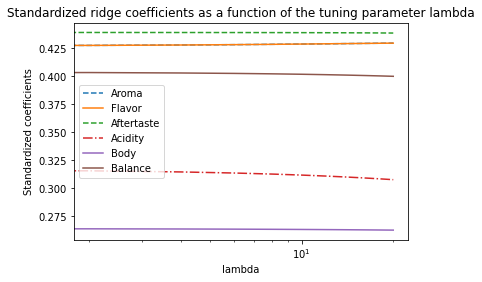

In [115]:
fig, ax = plt.subplots()
plt.plot(lambda_, coefs_Flavor, linestyle = "--", label="Aroma")
plt.plot(lambda_, coefs_Flavor, linestyle = "-", label="Flavor")
plt.plot(lambda_, coefs_Aftertaste, linestyle = "--", label="Aftertaste")
plt.plot(lambda_, coefs_Acidity, linestyle = "-.", label="Acidity")
plt.plot(lambda_, coefs_Body, linestyle = "-", label="Body")
plt.plot(lambda_, coefs_Balance, linestyle = "-", label="Balance")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('Standardized coefficients')
plt.title('Standardized ridge coefficients as a function of the tuning parameter lambda');

In [116]:
MSE = [] # stores the mean square error
variance = []
bias = []

In [117]:
for a in lambda_:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train) # fit to model
    pred2 = ridge.predict(scale(X_test)) # Use this model to predict the test data
    sse = mean_squared_error(y_test, pred2) # Calculate the test MSE
    MSE.append(sse)
    var = np.var(pred2)
    variance.append(var) # calculate the variance
    bias.append(sse-var) # calculate the bias

Ordinary least squares regression coefficients and intercept


(array([ 0.3027268 ,  0.426906  ,  0.43887103,  0.31657893,  0.26396088,
         0.40351363,  0.41084186,  0.91656239,  0.54247035, -0.02039945]),
 82.0018831168831)

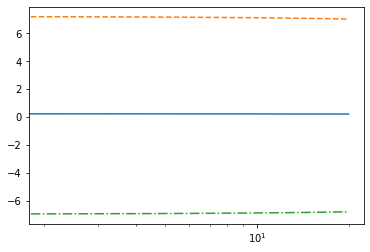

In [118]:
fig, ax = plt.subplots()
plt.plot(lambda_, MSE, linestyle = "-", label="MSE")
plt.plot(lambda_, variance, linestyle = "--", label="variance")
plt.plot(lambda_, bias, linestyle = "-.", label="bias")
ax.set_xscale('log')

# Print out the coefficients for the OLS fit that has alpha = 0
print("Ordinary least squares regression coefficients and intercept")
ridge.set_params(alpha=0)
ridge.fit(scale(X_train), y_train) # fit to model
ridge.coef_, ridge.intercept_ # coefficients, intercept

Performing MLR one more time, with reduced predictors

In [119]:
lm_fit_mlr = smf.ols('Tl_Cup_Point~Aroma+Flavor+Aftertaste+Acidity+Body+Balance', data=coffee).fit()
lm_fit_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Tl_Cup_Point   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     578.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          9.54e-308
Time:                        14:11:26   Log-Likelihood:                -1480.9
No. Observations:                 925   AIC:                             2976.
Df Residuals:                     918   BIC:                             3010.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4614      1.211     19.376      0.000      21.085      25.838
Aroma          0.7234      0.195      3.705      0.000       0.340       1.107
Flavor         2.4258      0.273      8.890      0.000       1.890       2.961
Aftertaste     2.3111      0.248      9.303      0.000       1.824       2.799
Acidity        0.5448      0.201      2.711      0.007       0.150       0.939
Body           0.0318      0.221      0.144      0.886      -0.403       0.466
Balance        1.8061      0.200      9.024      0.000       1.413       2.199
==============================================================================
Omnibus:                     1038.139   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110989.981
Skew:                          -5.329   Prob(JB):                         0.00
Kurtosis:                      55.594   Cond. No.                         566.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Conclusion:__ <br>
We noticed that when we further investigated the data, there were many signs of multicoliearity in various predictor variables. We run a multiple linear regression model again after removing the predictor variables and we still get a decent R-squared value. <br>

From running a principal component regression with 2 components, we still notice that our data has signifincant signs of multicolinearity, despite reducing the number of predictor varaibles used before hand.<br>

In determining which model would be most suitable in determning the total cup point of coffee, I would say that multiple linear regression would be preffered due to having a low mean squared error (MSE:0.0457) after peforming k-fold cross validation compared to PCR which had a highger mean squared error (MSE:6.144). However I would also reccomend collecting more data and further investigating the causes of multicolonerity in the data set.
